# Own model on Oyster and green oyster mushroom (Convolutional Neural Networks)

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as K
import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist, fashion_mnist,cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
X = []
y = []
classes = ['oyster_all', 'green_oyster', 'common_porecrust', 'many_colored_polypore', 'hairy_bracket' ] # define the classes
base_path = r'C:\Users\helge\spiced_projects_working folder\week9\imageclassifier-main\imageclassifier-main\week9_data\\'


In [3]:
for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
        # load the image
        img = load_img(base_path+target+'/'+file, target_size=(28, 28))
        # convert it to an array
        img_array = img_to_array(img)
        # append the array to X
        X.append(img_array)
        # append the numeric target to y
        y.append(i)

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [4]:
X.shape

(2872, 28, 28, 3)

In [5]:
img

In [6]:
img.size

(28, 28)

In [7]:
type(img)

PIL.Image.Image

#### LeNet-5 in Keras

Hint: Adjust the input_shape from 224 to 28, if you have issues with CPU or use Google Collap/ Kaggle

In [8]:
### Implement LeNet-5 architecture 
K.clear_session()
model = Sequential([
    
    ### Convolutional layers
    Conv2D(filters = 6 , kernel_size = (5,5), 
           strides = (1,1), padding = "valid" , 
           activation = tk.activations.relu , input_shape = (28,28,3), # use relu
           kernel_initializer=tk.initializers.GlorotNormal(seed=34)),  # how to initialise the model parameters
           
    
    MaxPooling2D(pool_size = (2,2), strides=(2,2), padding = "valid"),
    
    Conv2D(filters= 16, kernel_size = (5,5), strides = (1,1), padding = "valid" , 
           activation = tk.activations.relu) ,  # use relu
            
    
    MaxPooling2D(pool_size = (2,2), strides=(2,2), padding = "valid"),
    
    ### Fully connected layers for classification
    
    Flatten(),
    
    Dense(units=120, activation= tk.activations.relu),  # use relu
    
    Dense(units=84, activation=tk.activations.relu), # use relu
          
    
    
    # Output layer
    # think of how many categories we have to predict 
    Dense(units=10, activation=tk.activations.softmax)
])

In [9]:
# Check the summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [10]:
# Compile
model.compile(optimizer=tk.optimizers.Adam(), # Adam
              loss='sparse_categorical_crossentropy' , # multiclass: 'categorical_crossentropy' 
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X, y, epochs=20,
                    batch_size=60,
                    validation_split = 0.2,
                   )

Epoch 1/20
39/39 [==============================] - 3s 28ms/step - loss: 2.8010 - accuracy: 0.4806 - val_loss: 1.1115 - val_accuracy: 0.5478
Epoch 2/20
39/39 [==============================] - 0s 10ms/step - loss: 0.9357 - accuracy: 0.6417 - val_loss: 0.8107 - val_accuracy: 0.6904
Epoch 3/20
39/39 [==============================] - 1s 30ms/step - loss: 0.6946 - accuracy: 0.7292 - val_loss: 0.6962 - val_accuracy: 0.7443
Epoch 4/20
39/39 [==============================] - 1s 24ms/step - loss: 0.5263 - accuracy: 0.7971 - val_loss: 0.5527 - val_accuracy: 0.8000
Epoch 5/20
39/39 [==============================] - 1s 21ms/step - loss: 0.4302 - accuracy: 0.8533 - val_loss: 0.5197 - val_accuracy: 0.7983
Epoch 6/20
39/39 [==============================] - 1s 28ms/step - loss: 0.3343 - accuracy: 0.8846 - val_loss: 0.4423 - val_accuracy: 0.8417
Epoch 7/20
39/39 [==============================] - 1s 27ms/step - loss: 0.2738 - accuracy: 0.8999 - val_loss: 0.4141 - val_accuracy: 0.8435
Epoch 8/20
39

### Examine the model

In [12]:
history.history

{'loss': [2.800995111465454,
  0.9356647729873657,
  0.6946307420730591,
  0.5262747406959534,
  0.4301544725894928,
  0.33433517813682556,
  0.27384039759635925,
  0.21582917869091034,
  0.16316719353199005,
  0.13637837767601013,
  0.0981023982167244,
  0.08701719343662262,
  0.05524956062436104,
  0.039146844297647476,
  0.04003824666142464,
  0.02964072860777378,
  0.01983708143234253,
  0.014554645866155624,
  0.011515718884766102,
  0.007699258159846067],
 'accuracy': [0.4806269109249115,
  0.6417065858840942,
  0.7292119860649109,
  0.7971267104148865,
  0.8532869219779968,
  0.8846321105957031,
  0.8998693823814392,
  0.9251196980476379,
  0.9438397884368896,
  0.9551588892936707,
  0.9747496843338013,
  0.9747496843338013,
  0.9865041375160217,
  0.9917283654212952,
  0.9930344223976135,
  0.9960818290710449,
  0.9969525337219238,
  0.9978232383728027,
  0.9982585906982422,
  0.9991292953491211],
 'val_loss': [1.1114652156829834,
  0.8106648325920105,
  0.6961909532546997,
  0

Text(0.5, 0, 'epochs')

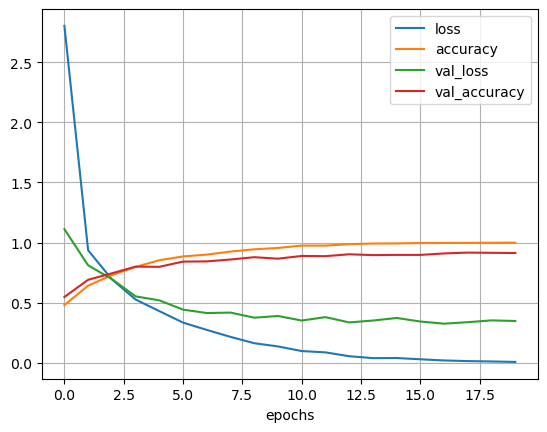

In [13]:
# Plot loss and accuracy curves
pd.DataFrame(data=history.history).plot()
plt.grid(True)
plt.xlabel('epochs')